In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class Board:
    def __init__(self):
        size = 8
        white = (1, 1, 1)
        self.grid = np.zeros((size, size, 3))
        #help from GraceC on this
        for i in range(size): #row
            for j in range(size): #column
                if (i+j) % 2 == 0:
                    self.grid[i][j] = white

    def add_red(self, row, col):
        red = (1, 0, 0)
        self.grid[row, col] = red
    
    def add_blue(self, row, col):
        blue = (0, 0, 1)
        self.grid[row, col] = blue
    
    def render(self):
        plt.imshow(self.grid)

    def is_under_attack(self):
        pass

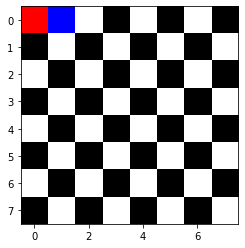

In [25]:
board = Board()
board.add_red(0,0)
board.add_blue(0,1)
board.render()